In [1]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np


In [2]:
#df = pd.read_csv('vaccinationbydatew3sentimentolddata.csv')
#df = pd.read_csv('vaccinationbydatew3sentimentolddatawNLTK.csv')
df = pd.read_csv('vaccinationbydatew3sentimentolddatawNLTKreduced.csv')

df

,index,normalized_date,Administered,DailyAdministered,textblob_agg_sentiment,nltk_agg_sentiment,Vader_agg_sentiment
0,118,4/8/2021,102550132,1883757.0,318890.745500,-1459204.6,293188
1,123,4/13/2021,111653632,1328222.0,307659.217600,-1651687.2,711207
2,173,6/22/2021,163901489,270615.0,296599.783700,-2591350.8,639441
3,182,7/1/2021,167348632,636732.0,283439.891300,-2483905.8,650424
4,209,8/2/2021,176740825,277559.0,261132.334200,-816108.0,637320
...,...,...,...,...,...,...,...
228,14,12/25/2020,1599407,389721.0,176.883838,-712.0,360
229,54,2/3/2021,24691065,604150.0,164.308631,-118.4,296
230,52,2/1/2021,23673559,753636.0,115.844048,-334.8,341
231,57,2/6/2021,27622132,1213598.0,115.333144,-507.0,312


In [3]:
df.sort_values(by = 'normalized_date',ascending = False, inplace=True)
df

,index,normalized_date,Administered,DailyAdministered,textblob_agg_sentiment,nltk_agg_sentiment,Vader_agg_sentiment
88,239,9/1/2021,188923898,459950.0,60993.034330,-276955.8,128238
35,216,8/9/2021,179765766,312952.0,119118.961600,-468241.2,310412
89,215,8/8/2021,179452814,458642.0,60765.743010,-213848.6,168714
117,214,8/7/2021,178994172,516964.0,40030.285050,-146565.6,117196
59,213,8/6/2021,178477208,503952.0,94131.117000,-334322.8,245196
...,...,...,...,...,...,...,...
192,33,1/13/2021,8025521,556398.0,1458.262976,-3751.8,3552
184,32,1/12/2021,7469123,285463.0,2256.229885,-1484.0,5830
194,31,1/11/2021,7183660,349272.0,1420.853516,-2436.6,2139
189,30,1/10/2021,6834388,645695.0,1653.385786,-2643.2,4248


In [4]:
c = [n-nn for n,nn in zip(df['Administered'],df['Administered'][1:]+[0])]
c.append(0)

In [5]:
df['AdministeredbyDay'] = c

In [6]:
df

,index,normalized_date,Administered,DailyAdministered,textblob_agg_sentiment,nltk_agg_sentiment,Vader_agg_sentiment,AdministeredbyDay
88,239,9/1/2021,188923898,459950.0,60993.034330,-276955.8,128238,9158132
35,216,8/9/2021,179765766,312952.0,119118.961600,-468241.2,310412,312952
89,215,8/8/2021,179452814,458642.0,60765.743010,-213848.6,168714,458642
117,214,8/7/2021,178994172,516964.0,40030.285050,-146565.6,117196,516964
59,213,8/6/2021,178477208,503952.0,94131.117000,-334322.8,245196,503952
...,...,...,...,...,...,...,...,...
192,33,1/13/2021,8025521,556398.0,1458.262976,-3751.8,3552,556398
184,32,1/12/2021,7469123,285463.0,2256.229885,-1484.0,5830,285463
194,31,1/11/2021,7183660,349272.0,1420.853516,-2436.6,2139,349272
189,30,1/10/2021,6834388,645695.0,1653.385786,-2643.2,4248,3520405


In [7]:
df

,index,normalized_date,Administered,DailyAdministered,textblob_agg_sentiment,nltk_agg_sentiment,Vader_agg_sentiment,AdministeredbyDay
88,239,9/1/2021,188923898,459950.0,60993.034330,-276955.8,128238,9158132
35,216,8/9/2021,179765766,312952.0,119118.961600,-468241.2,310412,312952
89,215,8/8/2021,179452814,458642.0,60765.743010,-213848.6,168714,458642
117,214,8/7/2021,178994172,516964.0,40030.285050,-146565.6,117196,516964
59,213,8/6/2021,178477208,503952.0,94131.117000,-334322.8,245196,503952
...,...,...,...,...,...,...,...,...
192,33,1/13/2021,8025521,556398.0,1458.262976,-3751.8,3552,556398
184,32,1/12/2021,7469123,285463.0,2256.229885,-1484.0,5830,285463
194,31,1/11/2021,7183660,349272.0,1420.853516,-2436.6,2139,349272
189,30,1/10/2021,6834388,645695.0,1653.385786,-2643.2,4248,3520405


In [8]:
df.to_csv('US_administered_doses20190920.csv')

In [9]:
#X = df.loc[:,['textblob_agg_sentiment','nltk_agg_sentiment','Vader_agg_sentiment']]

#X = df.loc[:,['textblob_agg_sentiment']]
#X = df.loc[:,['nltk_agg_sentiment']]
X = df.loc[:,['Vader_agg_sentiment']]
#X = df.loc[:,['textblob_agg_sentiment','Vader_agg_sentiment']]



y= df['Administered']
#y= df['AdministeredbyDay']

In [10]:
X

,Vader_agg_sentiment
88,128238
35,310412
89,168714
117,117196
59,245196
...,...
192,3552
184,5830
194,2139
189,4248


In [11]:
model = LinearRegression()

In [12]:
model.fit(X, y)

LinearRegression()

In [13]:
model.coef_

array([238.12292824])

In [14]:
model.intercept_

65712464.34051137

In [15]:
model.score(X,y)

0.290089154521432

In [16]:

##https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Administered   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     94.39
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           6.28e-19
Time:                        11:54:59   Log-Likelihood:                -4495.5
No. Observations:                 233   AIC:                             8995.
Df Residuals:                     231   BIC:                             9002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.571e+07    

C:\Users\Christopher\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### load test data and test

In [17]:
# load test data
testdf = pd.read_csv('Output/recent_tweets_sentiment.csv')

In [18]:
testdf

,normalized_date,Administered,textblob_agg_sentiment,nltk_agg_sentiment,Vader_agg_sentiment
0,9/14/2021,193018779,8.040003e+05,-2420559.0,1829945
1,9/15/2021,193369449,9.225411e+05,-2545853.4,1742715
2,9/16/2021,193682156,1.492497e+06,-1240308.4,3430392
3,9/17/2021,194020349,2.020566e+06,-6792375.0,831900
4,9/18/2021,194359833,2.594435e+06,-3332583.6,-795498


In [19]:
#X_pred = testdf.loc[:,['textblob_agg_sentiment','nltk_agg_sentiment','Vader_agg_sentiment']]
#X_pred = testdf.loc[:,['textblob_agg_sentiment']]
#X_pred = testdf.loc[:,['textblob_agg_sentiment','Vader_agg_sentiment']]
X_pred = testdf.loc[:,['Vader_agg_sentiment']]
#X_pred = testdf.loc[:,['nltk_agg_sentiment']]

In [20]:
y_test = testdf['Administered']

In [21]:
y_pred = model.predict(X_pred)

In [22]:
y_pred

array([ 5.01464326e+08,  4.80692863e+08,  8.82567452e+08,  2.63806928e+08,
       -1.23713849e+08])

In [23]:
y_pred

array([ 5.01464326e+08,  4.80692863e+08,  8.82567452e+08,  2.63806928e+08,
       -1.23713849e+08])

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test,y_pred)

-682437.388212506

In [25]:
X_pred

,Vader_agg_sentiment
0,1829945
1,1742715
2,3430392
3,831900
4,-795498


In [26]:
# import matplotlib.pyplot as plt
# plt.scatter(X, y_pred,  color='black')

In [27]:
outputdf=pd.DataFrame(y_pred)

In [28]:
outputdf['Predicted']=y_pred

In [29]:
outputdf

,0,Predicted
0,5.014643e+08,5.014643e+08
1,4.806929e+08,4.806929e+08
2,8.825675e+08,8.825675e+08
3,2.638069e+08,2.638069e+08
4,-1.237138e+08,-1.237138e+08


## plot

In [30]:
X

,Vader_agg_sentiment
88,128238
35,310412
89,168714
117,117196
59,245196
...,...
192,3552
184,5830
194,2139
189,4248


In [31]:
#X=np.array(X)
#X = X['textblob_agg_sentiment'].values
#X1 = X['textblob_agg_sentiment'].values
#X2 = X['Vader_agg_sentiment'].values
X = df[['textblob_agg_sentiment','Vader_agg_sentiment']].values.reshape(-1,2)


In [32]:
y = y.values

In [33]:
x=X[:,0]

In [34]:
z=y

In [35]:
y=X[:,1]

In [36]:
df

,index,normalized_date,Administered,DailyAdministered,textblob_agg_sentiment,nltk_agg_sentiment,Vader_agg_sentiment,AdministeredbyDay
88,239,9/1/2021,188923898,459950.0,60993.034330,-276955.8,128238,9158132
35,216,8/9/2021,179765766,312952.0,119118.961600,-468241.2,310412,312952
89,215,8/8/2021,179452814,458642.0,60765.743010,-213848.6,168714,458642
117,214,8/7/2021,178994172,516964.0,40030.285050,-146565.6,117196,516964
59,213,8/6/2021,178477208,503952.0,94131.117000,-334322.8,245196,503952
...,...,...,...,...,...,...,...,...
192,33,1/13/2021,8025521,556398.0,1458.262976,-3751.8,3552,556398
184,32,1/12/2021,7469123,285463.0,2256.229885,-1484.0,5830,285463
194,31,1/11/2021,7183660,349272.0,1420.853516,-2436.6,2139,349272
189,30,1/10/2021,6834388,645695.0,1653.385786,-2643.2,4248,3520405


In [37]:
import plotly.graph_objects as go

#mesh_size = .02
mesh_size = 100000000
margin = 0

In [38]:
X = df[['textblob_agg_sentiment', 'Vader_agg_sentiment']]
y = df['Administered']
X

,textblob_agg_sentiment,Vader_agg_sentiment
88,60993.034330,128238
35,119118.961600,310412
89,60765.743010,168714
117,40030.285050,117196
59,94131.117000,245196
...,...,...
192,1458.262976,3552
184,2256.229885,5830
194,1420.853516,2139
189,1653.385786,4248


In [39]:
X = X['Vader_agg_sentiment'].values

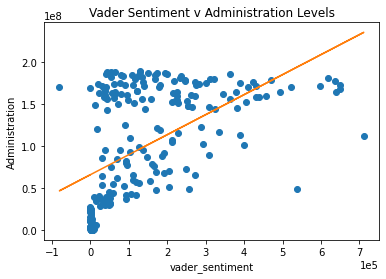

In [50]:
plt.plot(X,y,'o')
#m,b =np.polyfit(X[:,0],y,1)
m,b =np.polyfit(X,y,1)
plt.plot(X,m*X+b)

plt.title('Vader Sentiment v Administration Levels')
plt.xlabel("vader_sentiment")

plt.ylabel("Administration")
#plt.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.ticklabel_format(axis = "x",style ='sci',scilimits=(0,0))
#plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

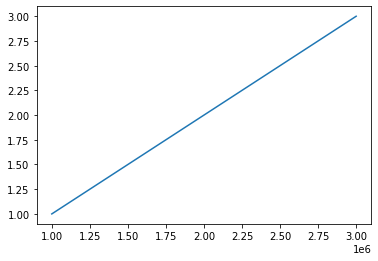

In [47]:
x_values = [1000000, 2000000, 3000000]

y_values = [1, 2, 3]

plt.plot(x_values, y_values)


plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))